<a href="https://colab.research.google.com/github/Narissarach/Project_eye/blob/main/Train%20fruit1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import PIL
import time
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import pickle as p
import plotly
from tensorflow.keras.models import load_model
from tensorflow.keras.models import model_from_json
import plotly.graph_objs as go
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## เตรียมชุดของข้อมูล

In [3]:
from google.colab import drive # เชื่อม drive ของเรา ถ้าเชื่อมสำเร็จจะขึ้นคำว่า Mounted at /content/drive 
drive.mount('/content/drive')
path = '/content/drive/My Drive/fruit data'  # ชี้ว่า data เราอยู่โฟล์เดอร์ไหน

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pathlib
data_dir = pathlib.Path('/content/drive/My Drive/fruit data')

In [6]:
batch_size = 15   # กำหนดขนาดของแต่ละการอ่านข้อมูล
img_height = 150  # ความสูงของรูปภาพแต่ละรูป
img_width = 150   # ความกว้างของรูปภาพแต่ละรูป

In [18]:
image_count = len(list(data_dir.glob('*/*.png')))
print("จำนวนรูปภาพทั้งหมด = ",image_count)

จำนวนรูปภาพทั้งหมด =  35


## Train

In [19]:
train = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
validation_split=0.1, # s แบ่งข้อมูล เพื่อ training 90% และ validation 10%
subset="training",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)
val = tf.keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.1,
subset="validation",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)

Found 35 files belonging to 5 classes.
Using 32 files for training.
Found 35 files belonging to 5 classes.
Using 3 files for validation.


In [20]:
class_names = train.class_names
print(class_names)

['apple1', 'banana1', 'mangosteen1', 'orange1', 'pineapple1']


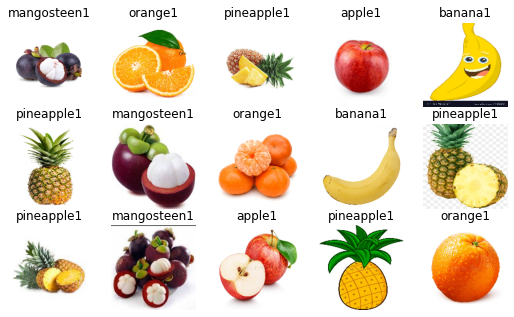

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9)) #ขนาด
for images, labels in train.take(1):
  for i in range(15): #มี 15 รูป
    ax = plt.subplot(5, 5, i + 1) #แถวละ 5
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [22]:
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(15, 150, 150, 3)
(15,)


## Normalization

In [23]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


## Model

In [24]:
num_classes = 5
epochs=20   # จำนวนครั้งที่เราจะ Train

In [25]:
model = Sequential([
layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
layers.Conv2D(16, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(32, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(64, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(num_classes)
])

In [26]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 37, 64)       

In [27]:
his = model.fit(
train,
validation_data=val,
epochs=epochs
)

Epoch 1/20
3/3 [==============================] - 1s 230ms/step - loss: 3.9027 - accuracy: 0.1562 - val_loss: 2.0143 - val_accuracy: 0.3333
Epoch 2/20
3/3 [==============================] - 1s 156ms/step - loss: 1.8776 - accuracy: 0.1875 - val_loss: 1.3740 - val_accuracy: 0.3333
Epoch 3/20
3/3 [==============================] - 1s 150ms/step - loss: 1.6185 - accuracy: 0.2188 - val_loss: 1.4040 - val_accuracy: 1.0000
Epoch 4/20
3/3 [==============================] - 1s 160ms/step - loss: 1.5465 - accuracy: 0.4062 - val_loss: 1.5017 - val_accuracy: 0.0000e+00
Epoch 5/20
3/3 [==============================] - 1s 161ms/step - loss: 1.4296 - accuracy: 0.4375 - val_loss: 1.6202 - val_accuracy: 0.0000e+00
Epoch 6/20
3/3 [==============================] - 1s 155ms/step - loss: 1.3983 - accuracy: 0.3750 - val_loss: 1.6278 - val_accuracy: 0.0000e+00
Epoch 7/20
3/3 [==============================] - 1s 157ms/step - loss: 1.3225 - accuracy: 0.4688 - val_loss: 1.1817 - val_accuracy: 0.3333
Epoch 8/

## Save Model

In [28]:
with open('history_model', 'wb') as file:
   p.dump(his.history, file)

filepath='model1.h5'
model.save(filepath)
filepath_model = 'model1.json'
filepath_weights = 'weights_model.h5'
model_json = model.to_json()
with open(filepath_model, "w") as json_file:
   json_file.write(model_json)

model.save_weights('weights_model.h5')
print("Saved model to disk")

Saved model to disk


## Load Model

In [29]:
with open('history_model', 'rb') as file:
   his = p.load(file)

h1 = go.Scatter(y=his['loss'],
mode="lines", line=dict(
width=2,
color='blue'),
name="loss"
)
h2 = go.Scatter(y=his['val_loss'],
mode="lines", line=dict(
width=2,
color='red'),
name="val_loss"
)

data = [h1,h2]
layout1 = go.Layout(title='Loss',
xaxis=dict(title='epochs'),
yaxis=dict(title=' '))
fig1 = go.Figure(data, layout=layout1)
plotly.offline.iplot(fig1, filename="testMNIST")
predict_model = load_model(filepath)
predict_model.summary()
with open(filepath_model, 'r') as f:
   loaded_model_json = f.read()
predict_model = model_from_json(loaded_model_json)
predict_model.load_weights(filepath_weights)
print("Loaded model from disk")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 37, 64)       

## Prediction

1/1 [==============================] - 0s 103ms/step
apple1 tf.Tensor(0.9091388, shape=(), dtype=float32) banana1 tf.Tensor(4.9245226e-09, shape=(), dtype=float32) mangosteen1 tf.Tensor(0.08957305, shape=(), dtype=float32) orange1 tf.Tensor(8.332488e-06, shape=(), dtype=float32) pineapple1 tf.Tensor(0.0012798719, shape=(), dtype=float32)


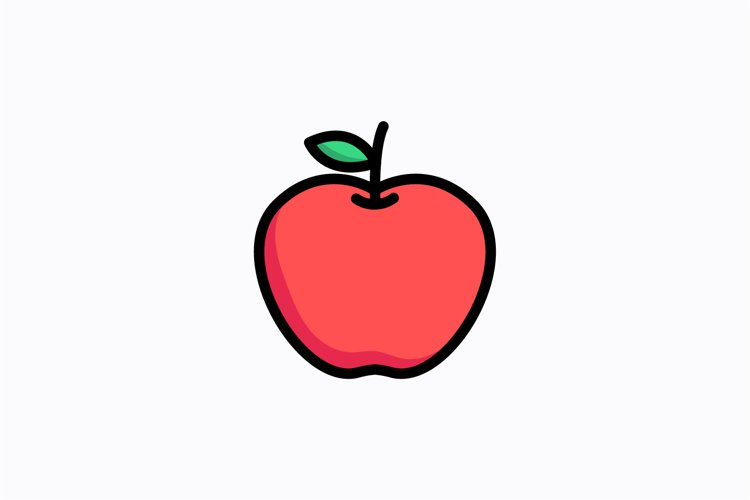

AI apple1 มีความมั่นใจ 90.91%.


In [30]:
import requests
from IPython.display import Image
from io import BytesIO
test_path = ('/content/drive/My Drive/a1.jpg')
img = keras.preprocessing.image.load_img(
test_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = predict_model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print("apple1",score[0],"banana1",score[1],"mangosteen1",score[2],"orange1",score[3],"pineapple1",score[4])
display(Image(filename=test_path,width=180, height=180))
if score[0]==np.max(score) :
   fruit = "apple1"
elif score[1]==np.max(score) :
   fruit = "banana1"
elif score[2]==np.max(score) :
   fruit = "mangosteen1"
elif score[3]==np.max(score) :
   fruit = "orange1"
elif score[4]==np.max(score) :
   fruit = "pineapple1"
print(
"AI {} มีความมั่นใจ {:.2f}%."
.format(fruit, 100 * np.max(score))
)

1/1 [==============================] - 0s 22ms/step
apple1 tf.Tensor(0.99968064, shape=(), dtype=float32) banana1 tf.Tensor(8.9298696e-13, shape=(), dtype=float32) mangosteen1 tf.Tensor(0.00012758531, shape=(), dtype=float32) orange1 tf.Tensor(0.00019125044, shape=(), dtype=float32) pineapple1 tf.Tensor(4.865205e-07, shape=(), dtype=float32)


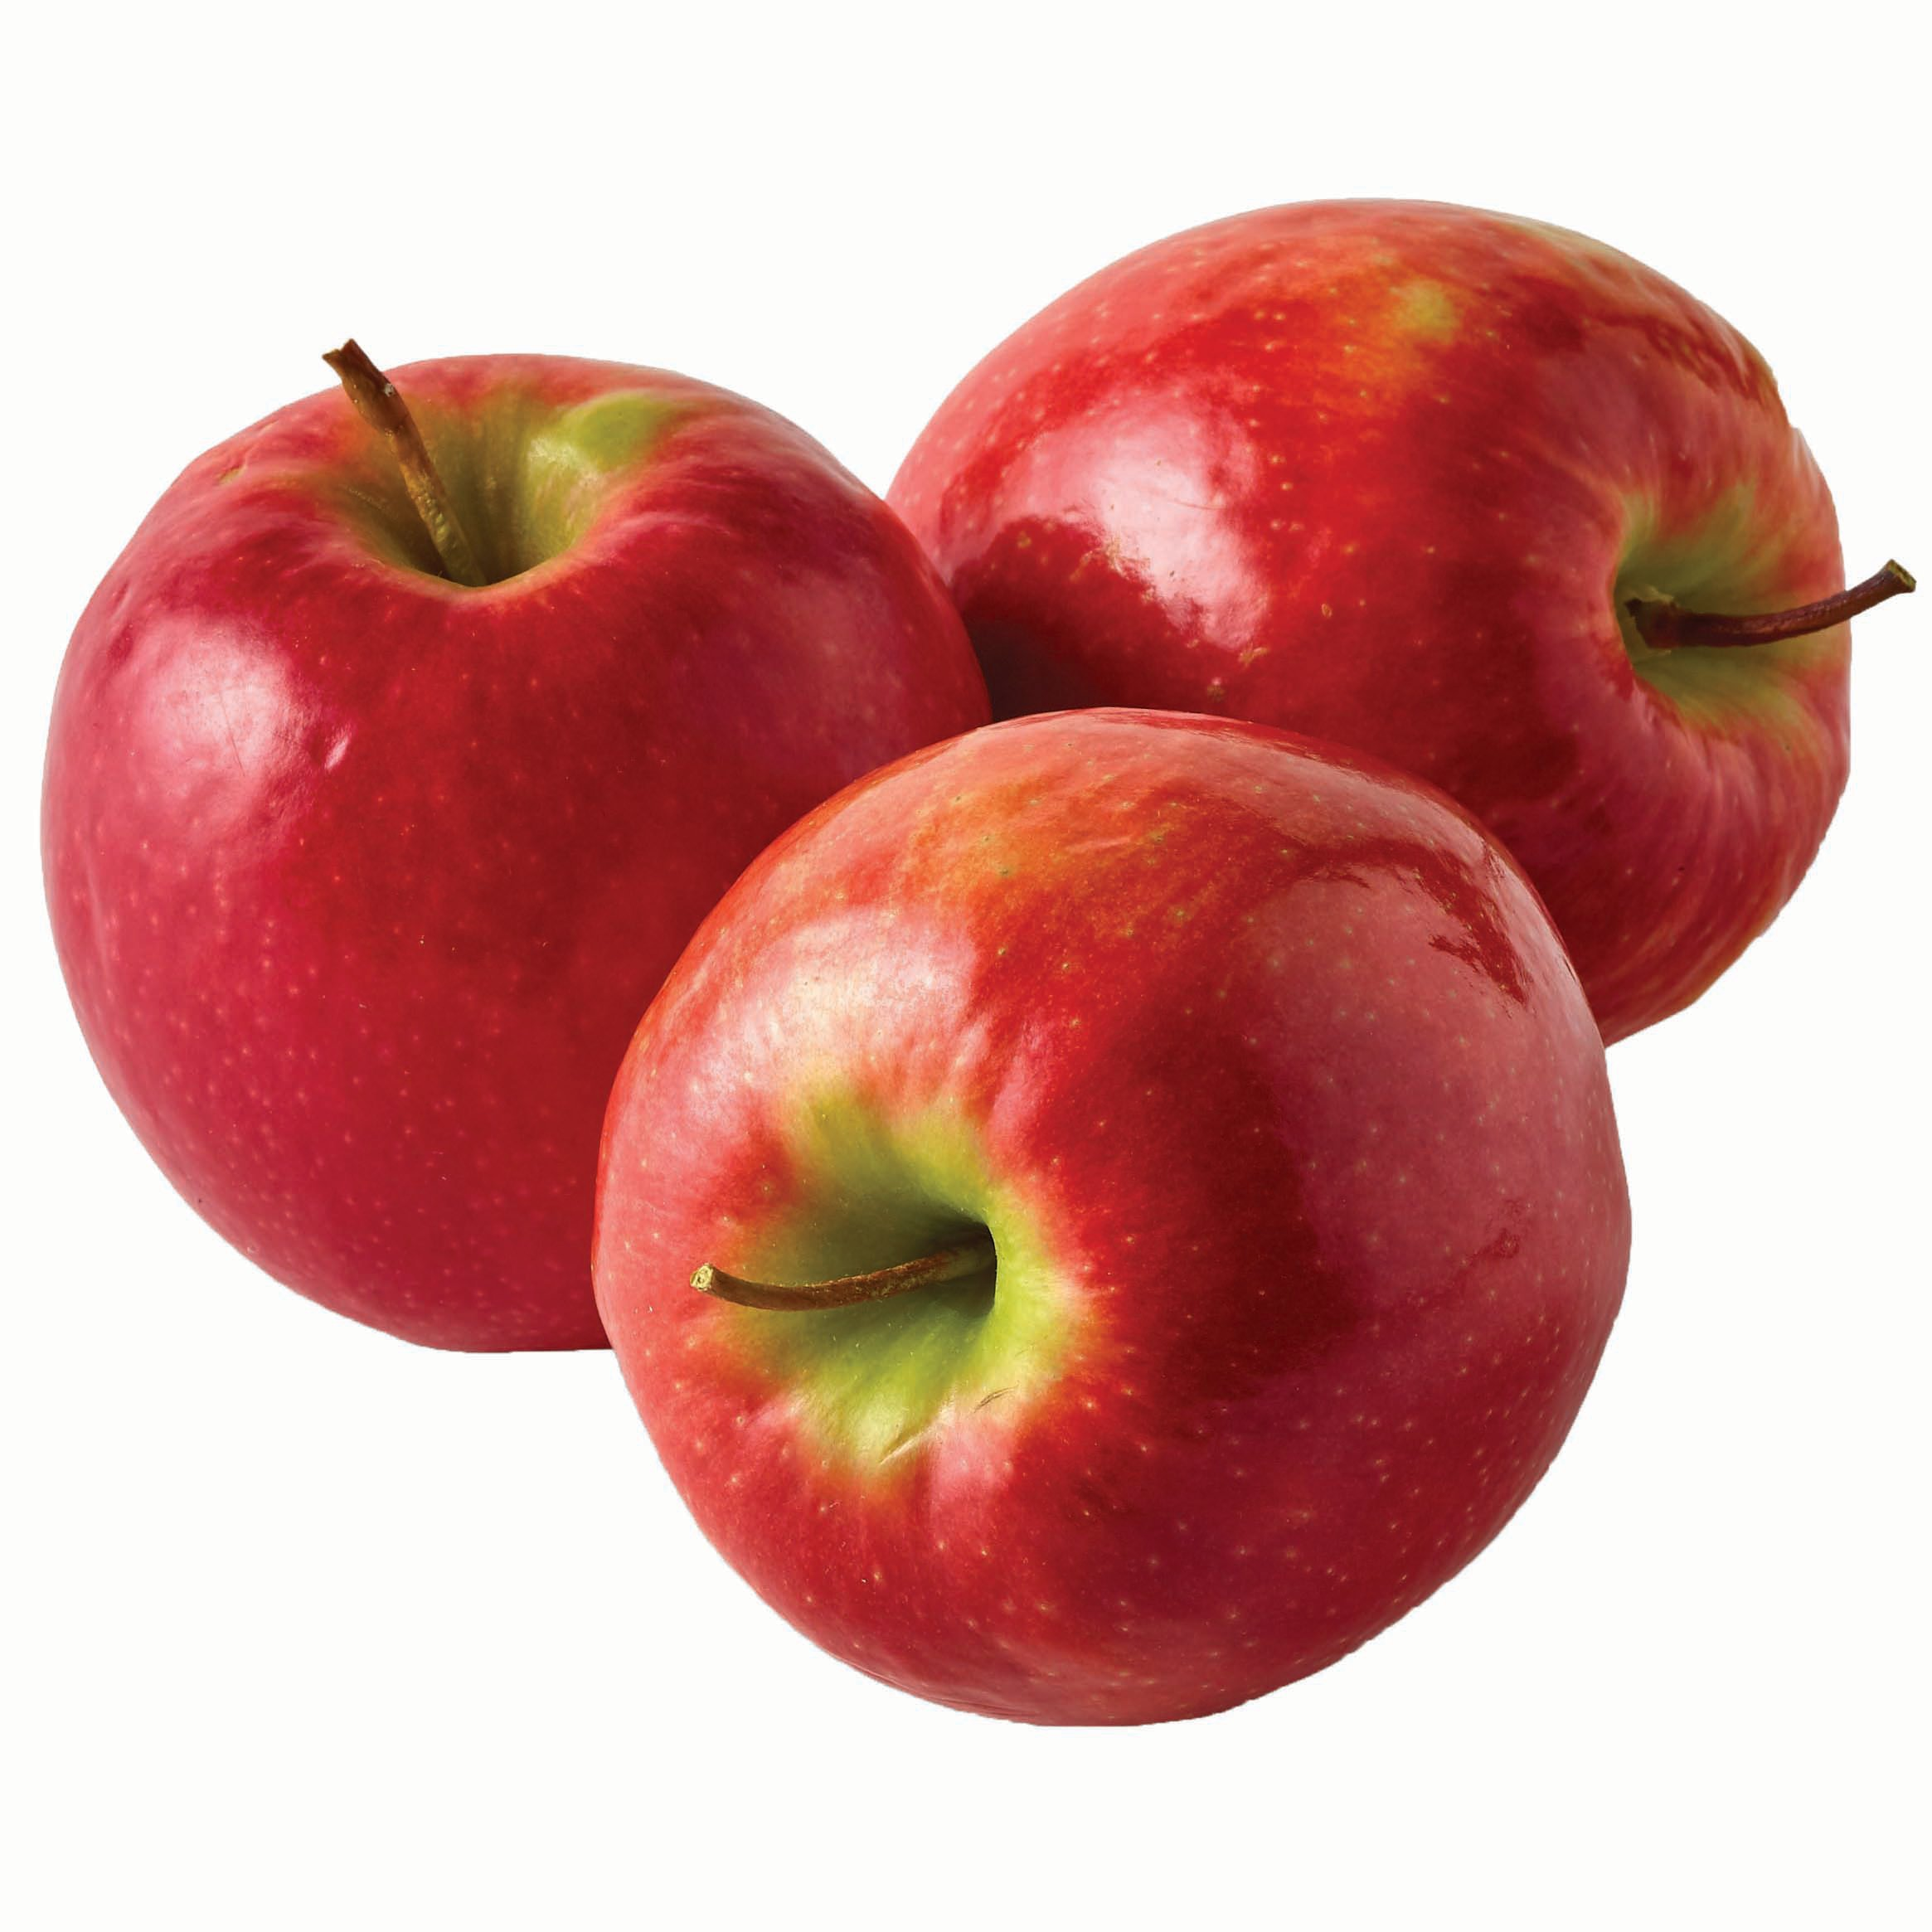

AI apple1 มีความมั่นใจ 99.97%.


In [31]:
test_path = ('/content/drive/My Drive/0/ap.jpg')
img = keras.preprocessing.image.load_img(
test_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = predict_model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print("apple1",score[0],"banana1",score[1],"mangosteen1",score[2],"orange1",score[3],"pineapple1",score[4])
display(Image(filename=test_path,width=180, height=180))
if score[0]==np.max(score) :
   fruit = "apple1"
elif score[1]==np.max(score) :
   fruit = "banana1"
elif score[2]==np.max(score) :
   fruit = "mangosteen1"
elif score[3]==np.max(score) :
   fruit = "orange1"
elif score[4]==np.max(score) :
   fruit = "pineapple1"
print(
"AI {} มีความมั่นใจ {:.2f}%."
.format(fruit, 100 * np.max(score))
)

1/1 [==============================] - 0s 19ms/step
apple1 tf.Tensor(0.000174457, shape=(), dtype=float32) banana1 tf.Tensor(0.008382474, shape=(), dtype=float32) mangosteen1 tf.Tensor(0.009558439, shape=(), dtype=float32) orange1 tf.Tensor(0.0033263618, shape=(), dtype=float32) pineapple1 tf.Tensor(0.9785583, shape=(), dtype=float32)


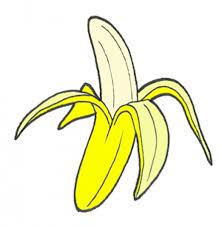

AI pineapple1 มีความมั่นใจ 97.86%.


In [33]:
test_path = ('/content/drive/My Drive/0/ba.jpg')
img = keras.preprocessing.image.load_img(
test_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = predict_model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print("apple1",score[0],"banana1",score[1],"mangosteen1",score[2],"orange1",score[3],"pineapple1",score[4])
display(Image(filename=test_path,width=180, height=180))
if score[0]==np.max(score) :
   fruit = "apple1"
elif score[1]==np.max(score) :
   fruit = "banana1"
elif score[2]==np.max(score) :
   fruit = "mangosteen1"
elif score[3]==np.max(score) :
   fruit = "orange1"
elif score[4]==np.max(score) :
   fruit = "pineapple1"
print(
"AI {} มีความมั่นใจ {:.2f}%."
.format(fruit, 100 * np.max(score))
)

1/1 [==============================] - 0s 19ms/step
apple1 tf.Tensor(0.42982286, shape=(), dtype=float32) banana1 tf.Tensor(4.1706897e-08, shape=(), dtype=float32) mangosteen1 tf.Tensor(0.5546488, shape=(), dtype=float32) orange1 tf.Tensor(0.0005447416, shape=(), dtype=float32) pineapple1 tf.Tensor(0.014983531, shape=(), dtype=float32)


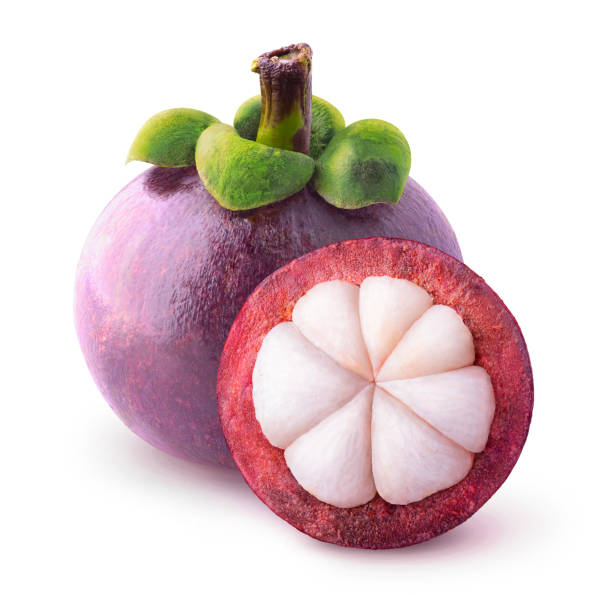

AI mangosteen1 มีความมั่นใจ 55.46%.


In [34]:
test_path = ('/content/drive/My Drive/0/ma.jpg')
img = keras.preprocessing.image.load_img(
test_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = predict_model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print("apple1",score[0],"banana1",score[1],"mangosteen1",score[2],"orange1",score[3],"pineapple1",score[4])
display(Image(filename=test_path,width=180, height=180))
if score[0]==np.max(score) :
   fruit = "apple1"
elif score[1]==np.max(score) :
   fruit = "banana1"
elif score[2]==np.max(score) :
   fruit = "mangosteen1"
elif score[3]==np.max(score) :
   fruit = "orange1"
elif score[4]==np.max(score) :
   fruit = "pineapple1"
print(
"AI {} มีความมั่นใจ {:.2f}%."
.format(fruit, 100 * np.max(score))
)

1/1 [==============================] - 0s 34ms/step
apple1 tf.Tensor(0.5286996, shape=(), dtype=float32) banana1 tf.Tensor(7.696935e-09, shape=(), dtype=float32) mangosteen1 tf.Tensor(9.614272e-05, shape=(), dtype=float32) orange1 tf.Tensor(0.47110775, shape=(), dtype=float32) pineapple1 tf.Tensor(9.656919e-05, shape=(), dtype=float32)


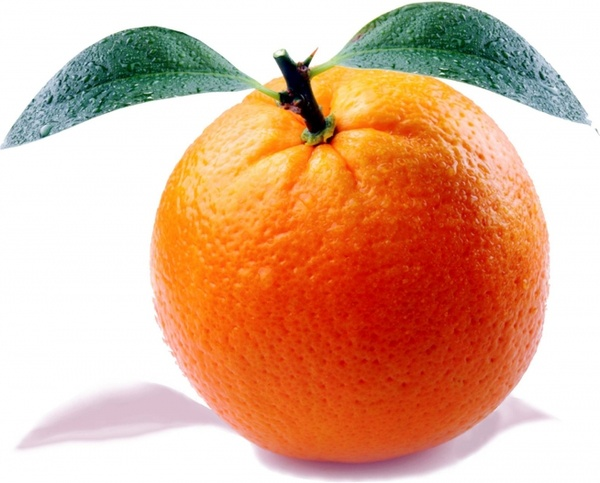

AI apple1 มีความมั่นใจ 52.87%.


In [35]:
test_path = ('/content/drive/My Drive/0/or.jpg')
img = keras.preprocessing.image.load_img(
test_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = predict_model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print("apple1",score[0],"banana1",score[1],"mangosteen1",score[2],"orange1",score[3],"pineapple1",score[4])
display(Image(filename=test_path,width=180, height=180))
if score[0]==np.max(score) :
   fruit = "apple1"
elif score[1]==np.max(score) :
   fruit = "banana1"
elif score[2]==np.max(score) :
   fruit = "mangosteen1"
elif score[3]==np.max(score) :
   fruit = "orange1"
elif score[4]==np.max(score) :
   fruit = "pineapple1"
print(
"AI {} มีความมั่นใจ {:.2f}%."
.format(fruit, 100 * np.max(score))
)

1/1 [==============================] - 0s 18ms/step
apple1 tf.Tensor(0.5010684, shape=(), dtype=float32) banana1 tf.Tensor(5.4026657e-07, shape=(), dtype=float32) mangosteen1 tf.Tensor(0.06011645, shape=(), dtype=float32) orange1 tf.Tensor(0.015344281, shape=(), dtype=float32) pineapple1 tf.Tensor(0.42347035, shape=(), dtype=float32)


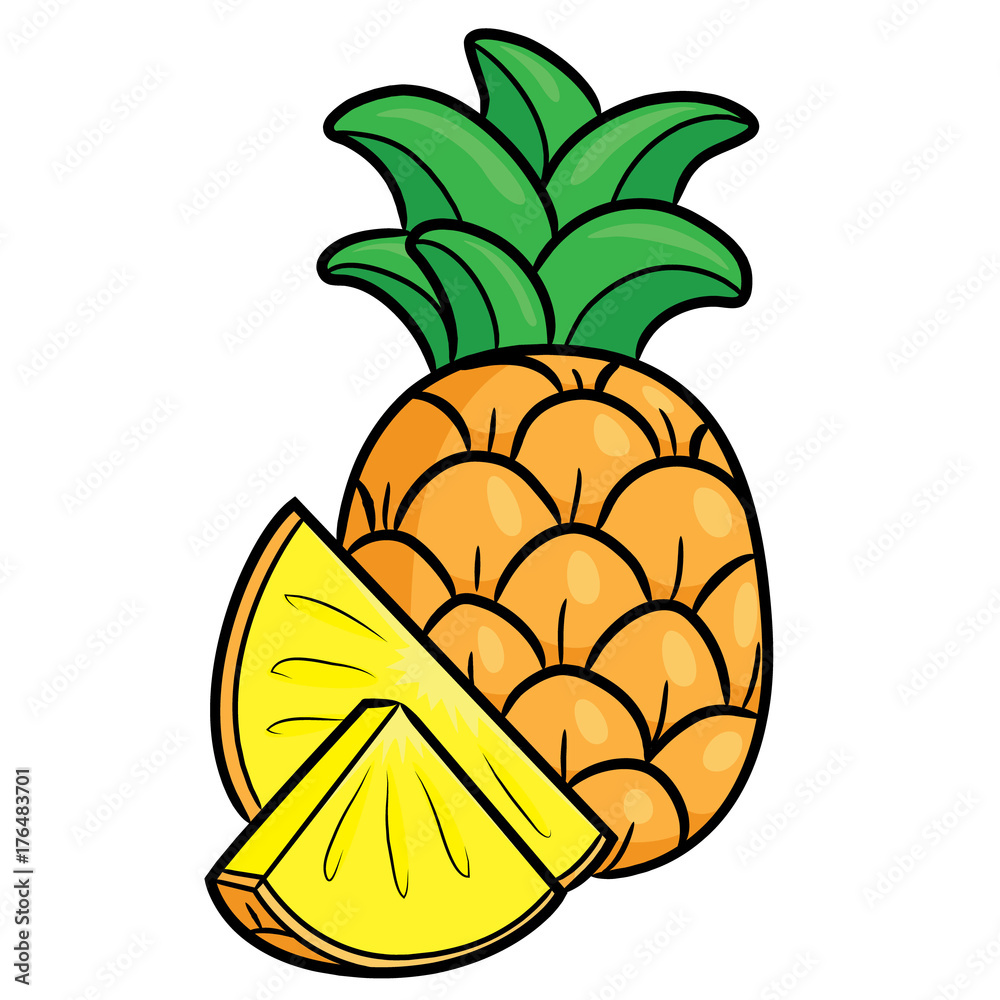

AI apple1 มีความมั่นใจ 50.11%.


In [36]:
test_path = ('/content/drive/My Drive/0/pi.jpg')
img = keras.preprocessing.image.load_img(
test_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = predict_model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print("apple1",score[0],"banana1",score[1],"mangosteen1",score[2],"orange1",score[3],"pineapple1",score[4])
display(Image(filename=test_path,width=180, height=180))
if score[0]==np.max(score) :
   fruit = "apple1"
elif score[1]==np.max(score) :
   fruit = "banana1"
elif score[2]==np.max(score) :
   fruit = "mangosteen1"
elif score[3]==np.max(score) :
   fruit = "orange1"
elif score[4]==np.max(score) :
   fruit = "pineapple1"
print(
"AI {} มีความมั่นใจ {:.2f}%."
.format(fruit, 100 * np.max(score))
)